# Predictive Analysis

Mengimpor library yang diperlukan untuk proyek ini.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

## Load Dataset

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dwisandikalla/predictive_analysis/refs/heads/main/Healthcare-Diabetes.csv")
data

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


## Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [4]:
# Mengecek duplikasi data
data.duplicated().sum()

np.int64(0)

Apabila dilihat secara seksama di atas, pada data tidak ada yang missing value dan semua type data sudah di sesuai. Saya di bawah menghapus kolom ID (karena kolom tersebut berisikan hanya nomor urut saja).

Memastikan bahwa tidak ada missing value.

In [5]:
data.isna().sum()

,0
Id,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [6]:
# Menghapus kolom id
data.drop('Id', axis=1, inplace=True)

Mencari statistika deskriptif untuk setiap kolom.

In [7]:
data.describe(include="all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


Membuat Box-plot untuk setiap kolom yang digunakan untuk mengetahui apakah terdapat outlier atau tidak.

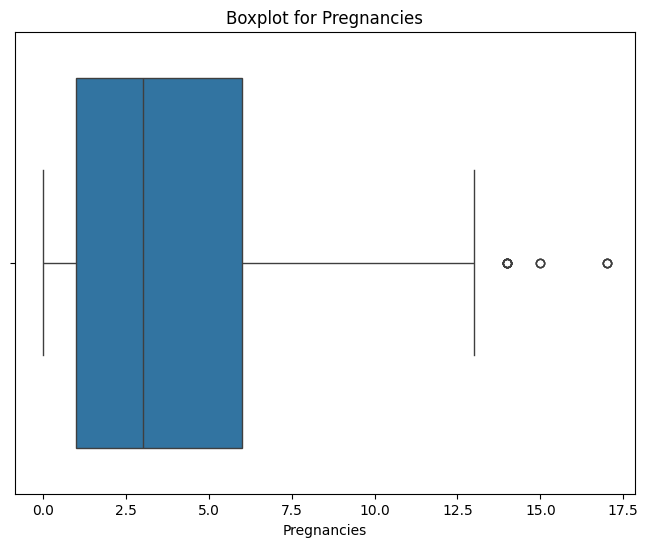

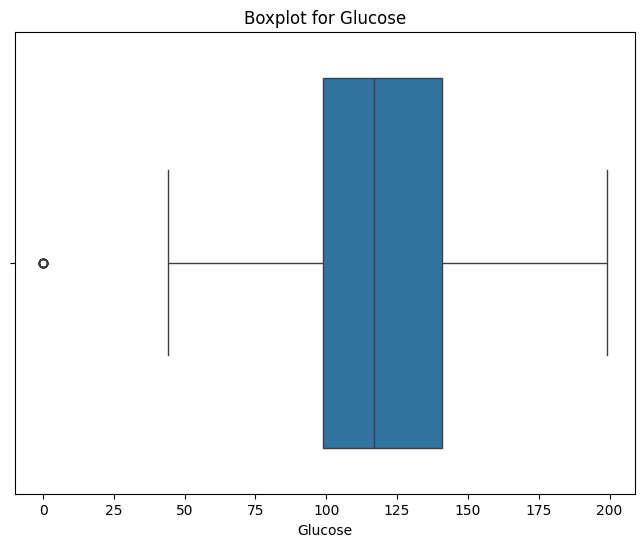

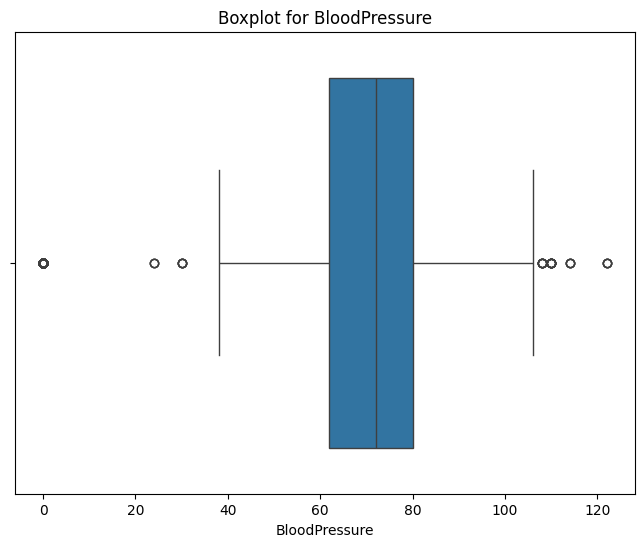

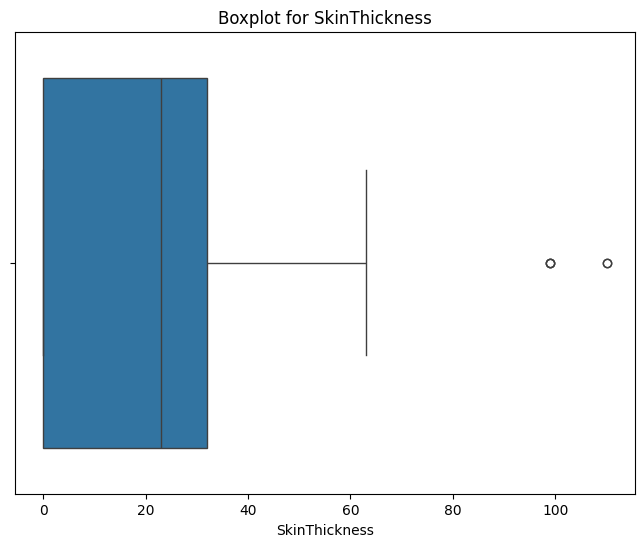

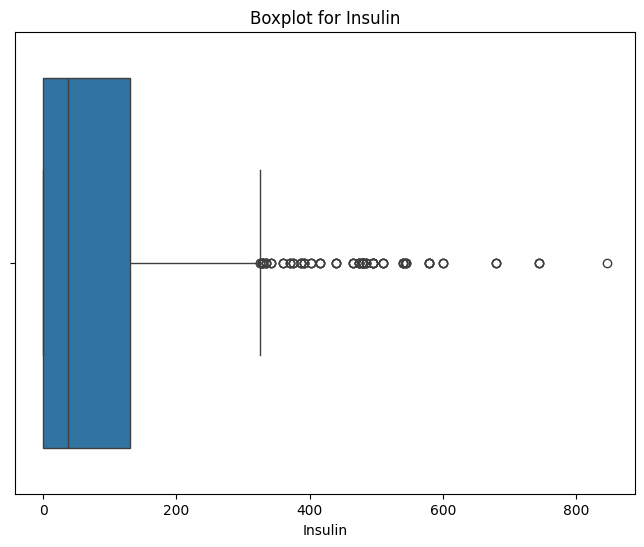

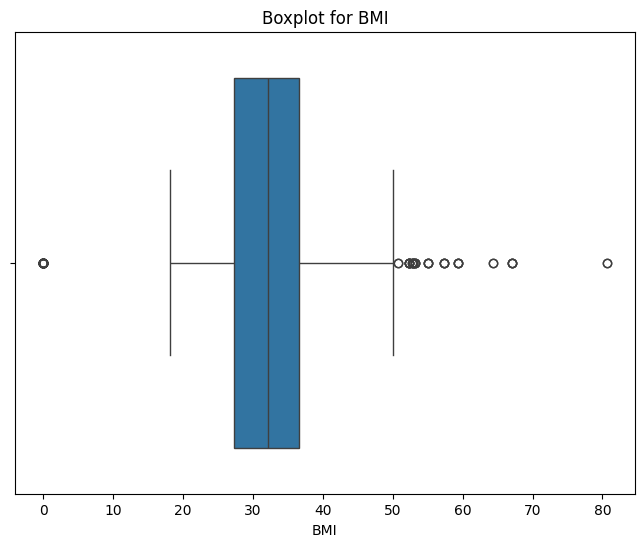

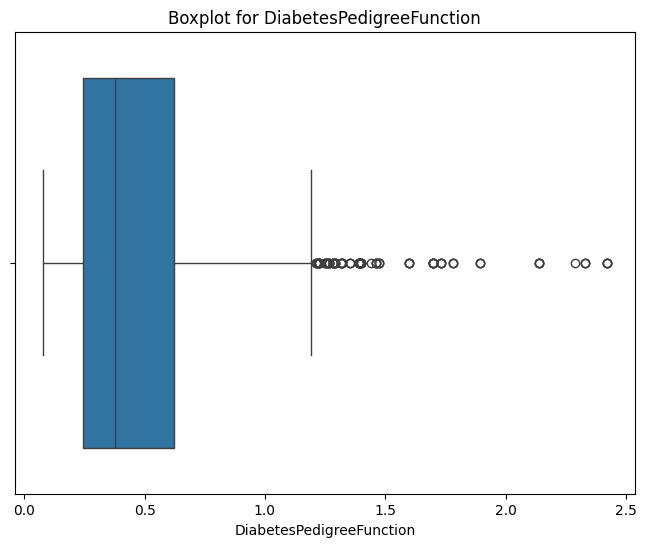

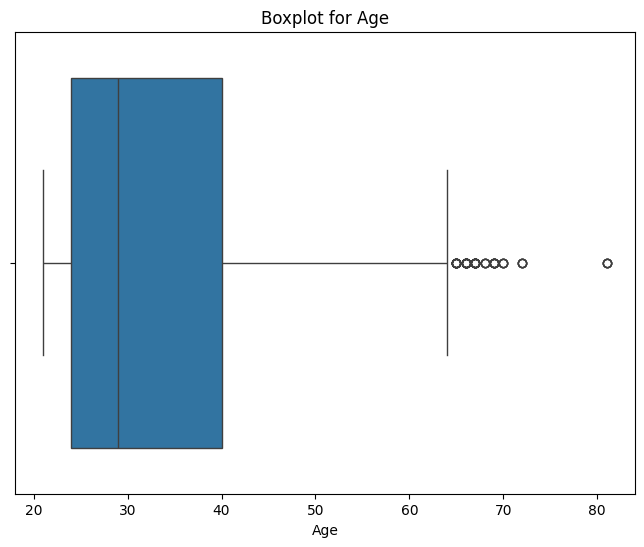

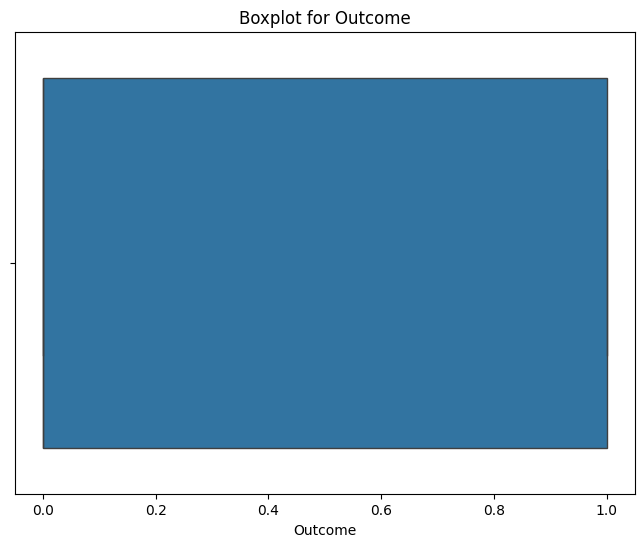

In [8]:
for column in data.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

Menghapus baris yang outlier dengan menggunakan metode IQR.

In [9]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
# Menghapus baris yang mengandung outlier
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2299 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2299 non-null   int64  
 1   Glucose                   2299 non-null   int64  
 2   BloodPressure             2299 non-null   int64  
 3   SkinThickness             2299 non-null   int64  
 4   Insulin                   2299 non-null   int64  
 5   BMI                       2299 non-null   float64
 6   DiabetesPedigreeFunction  2299 non-null   float64
 7   Age                       2299 non-null   int64  
 8   Outcome                   2299 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 179.6 KB


Menampilkan distribusi dari setiap kolom yang ada melalui histogram.

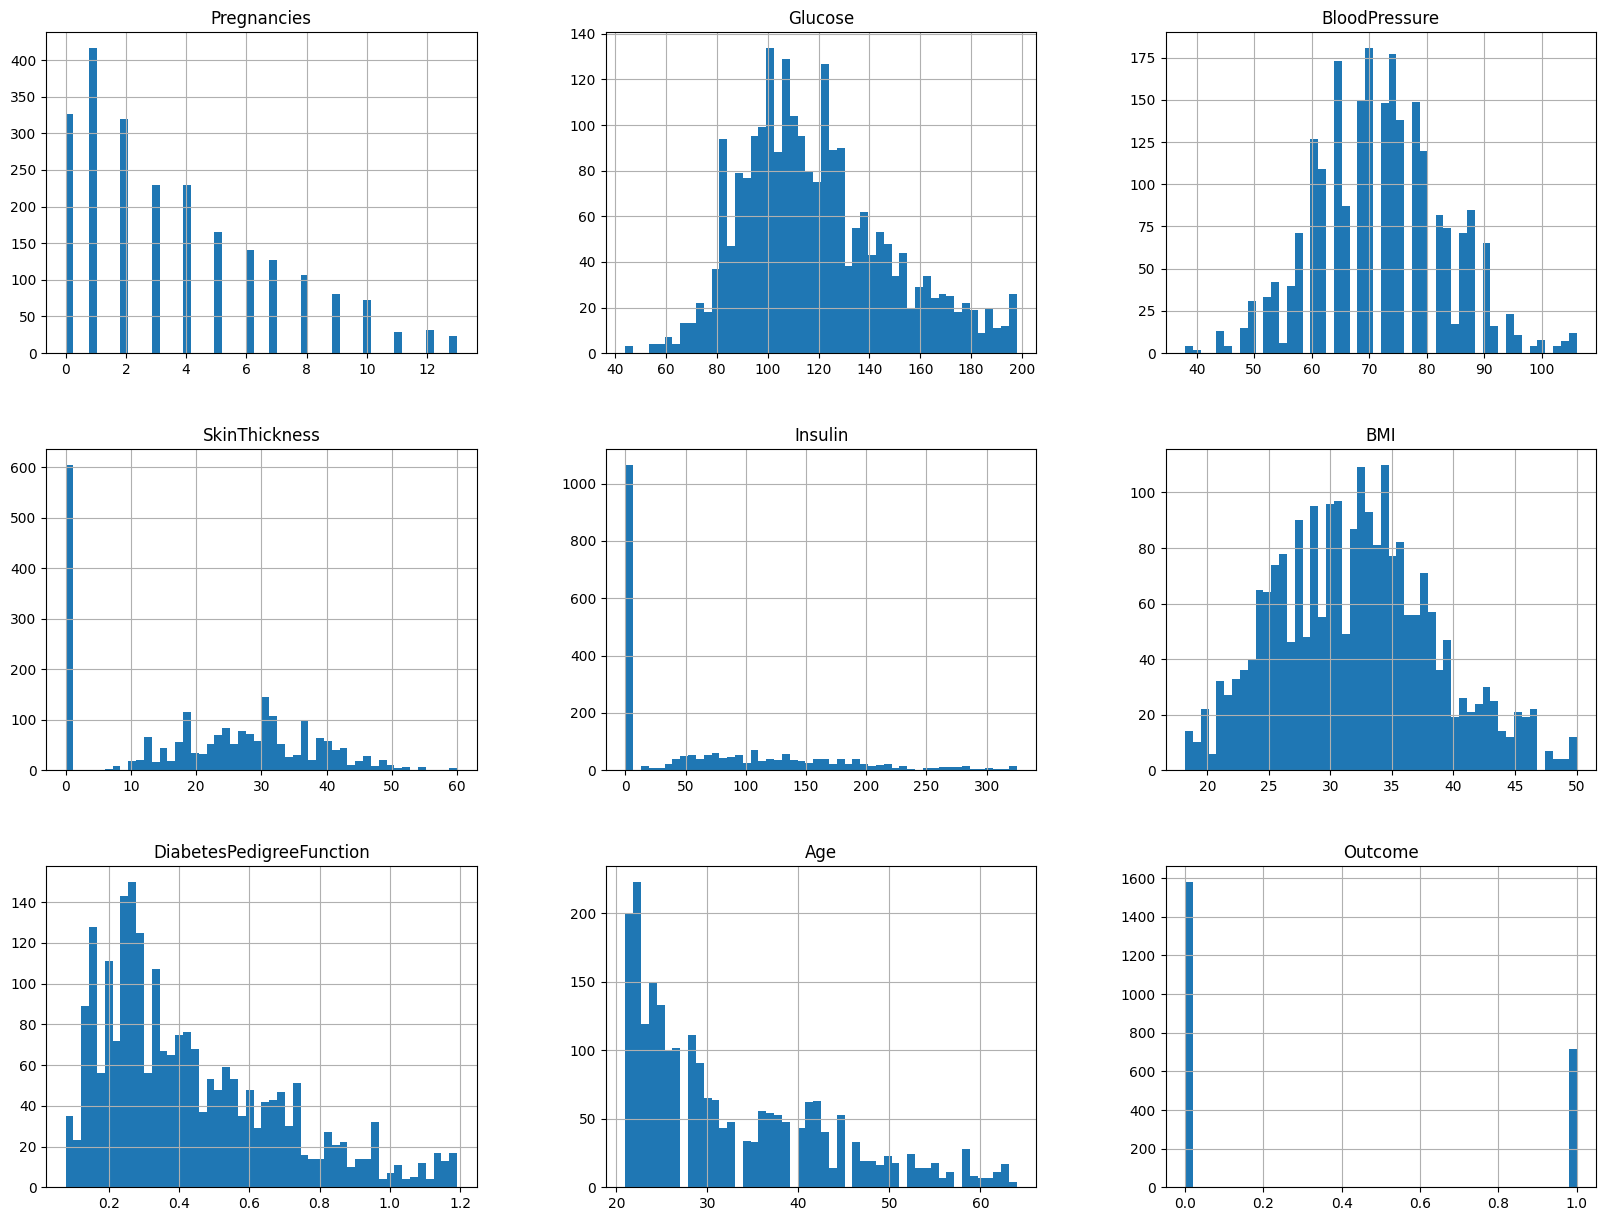

In [10]:
data.hist(bins=50, figsize=(20,15))
plt.show()

Menampilkan pairplot untuk mengetahui korelasi.

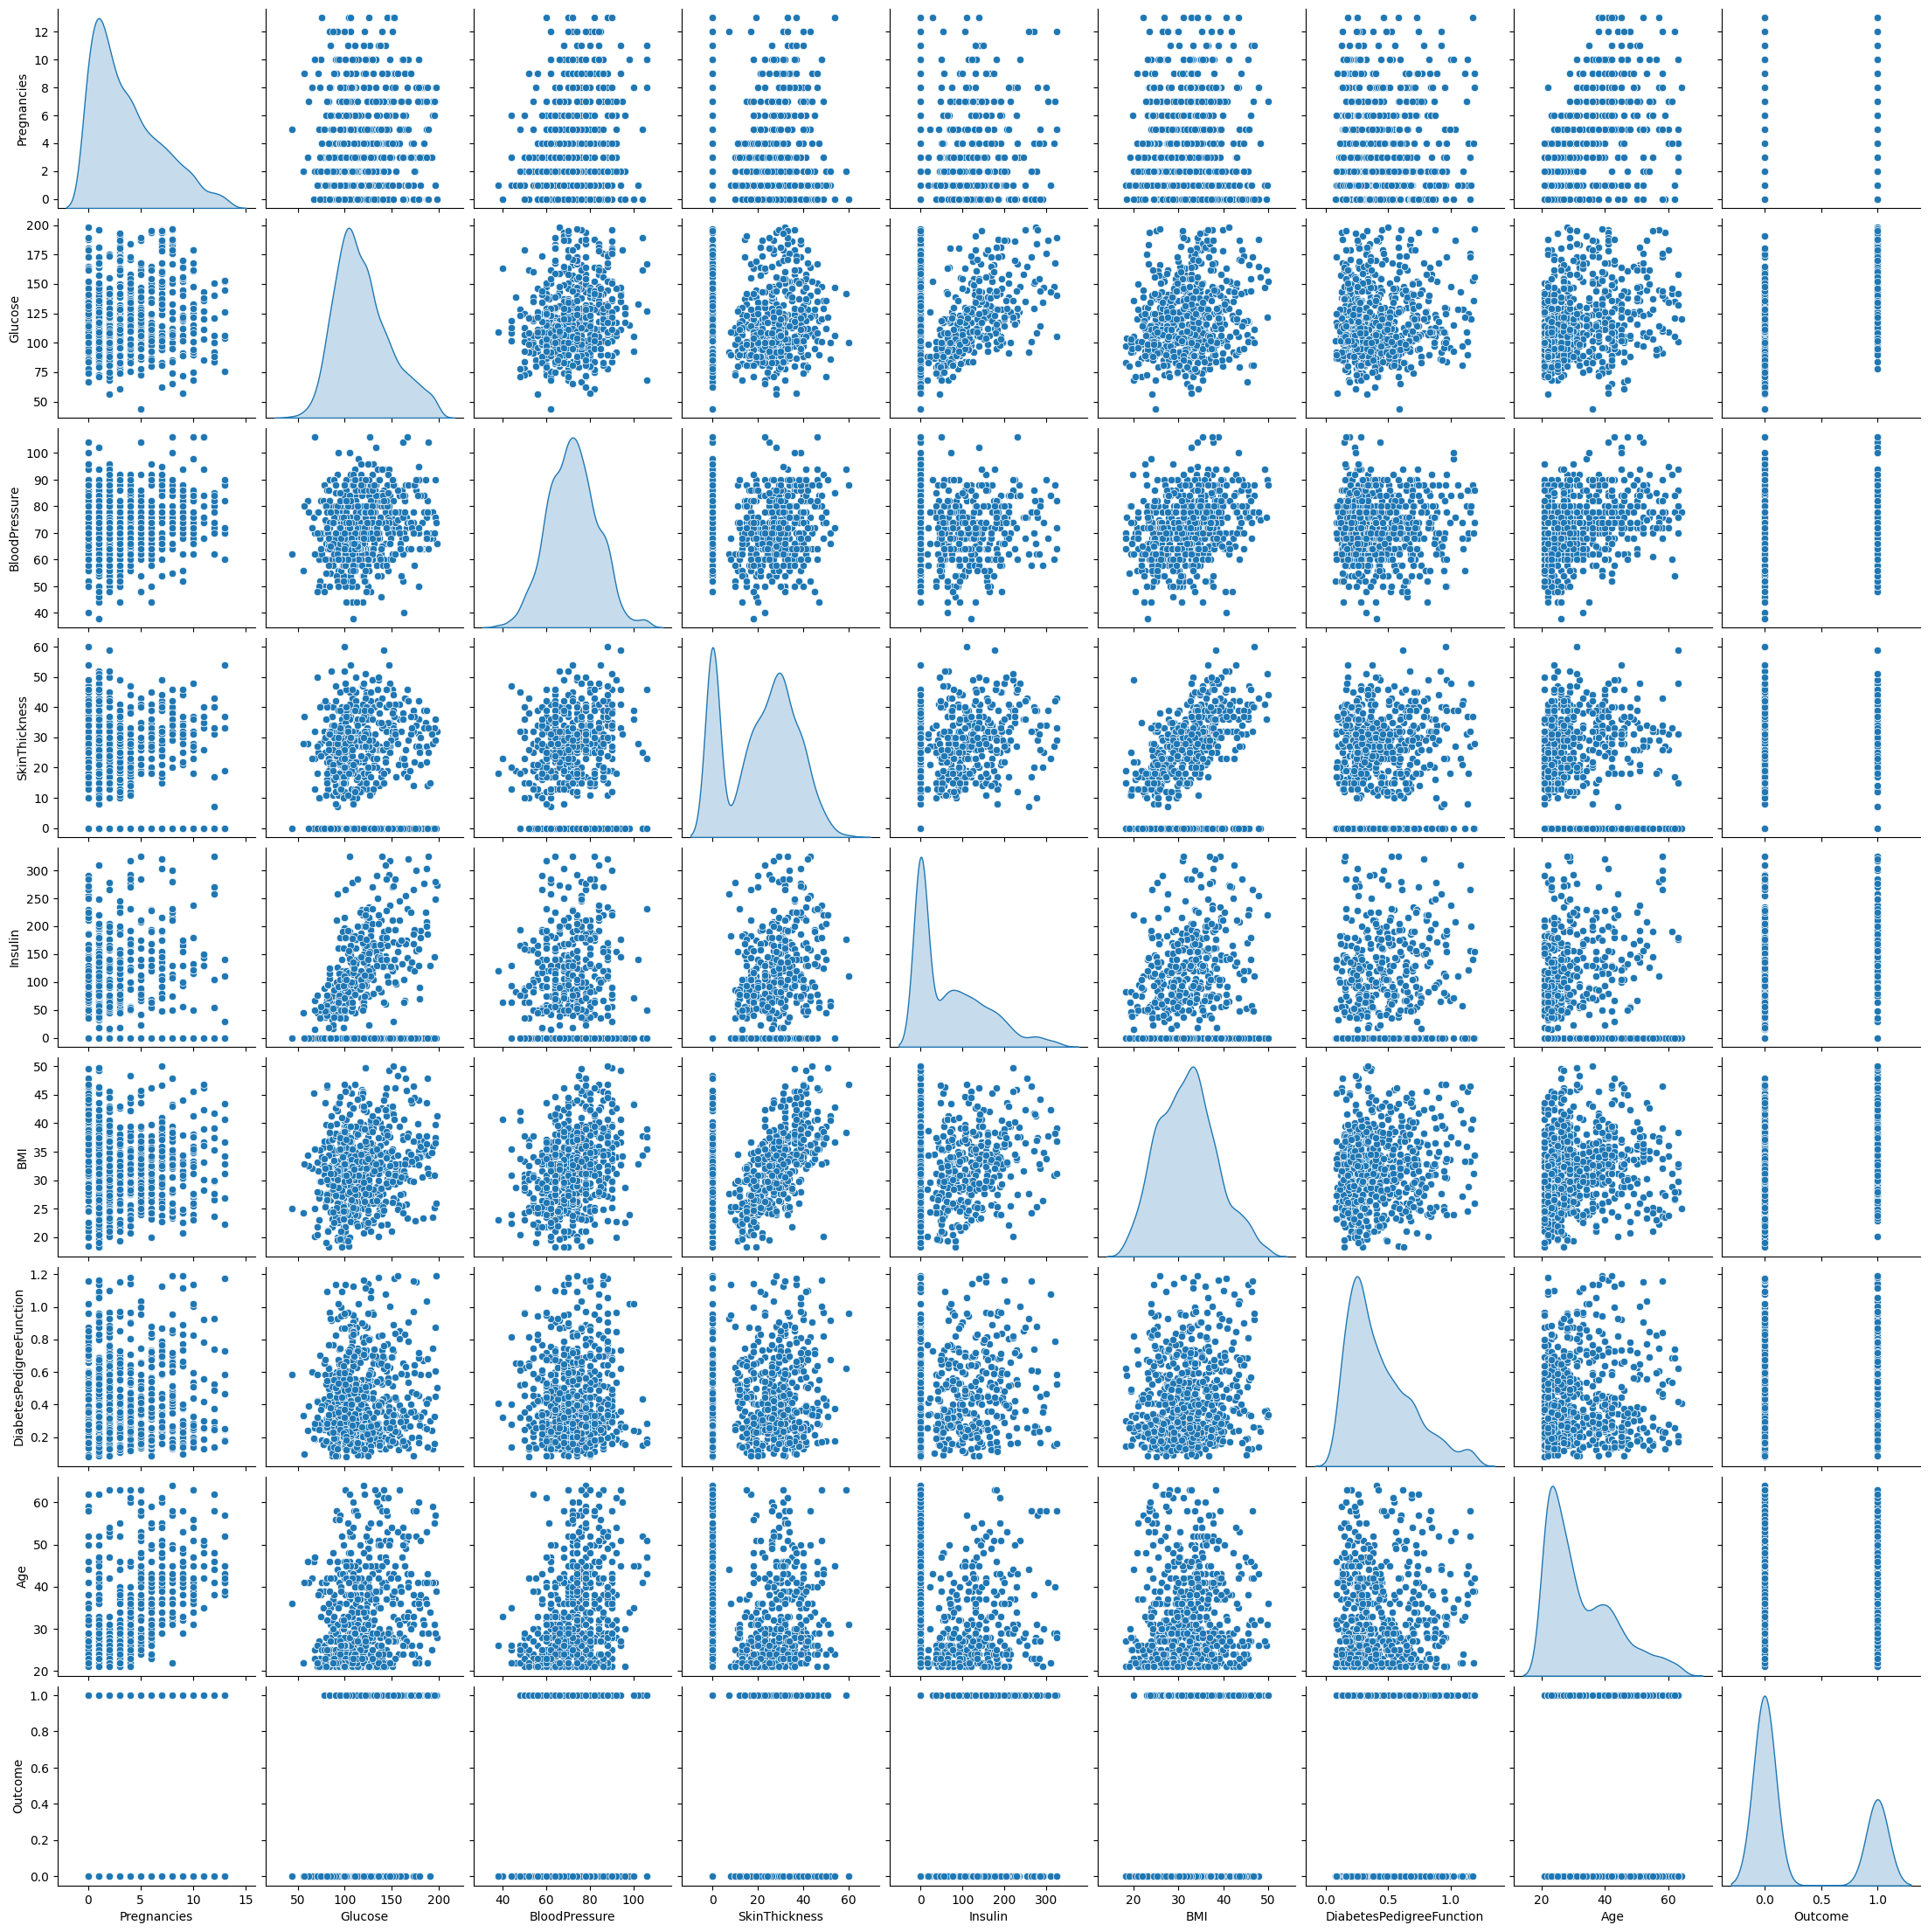

In [11]:
sns.pairplot(data, diag_kind = 'kde')

Menampilkan matriks korelasi untuk mengetahui korelasi outcome dengan fitur lainnya agar nampak lebih jelas dari segi pembacaan.

Text(0.5, 1.0, 'Correlation Matrix')

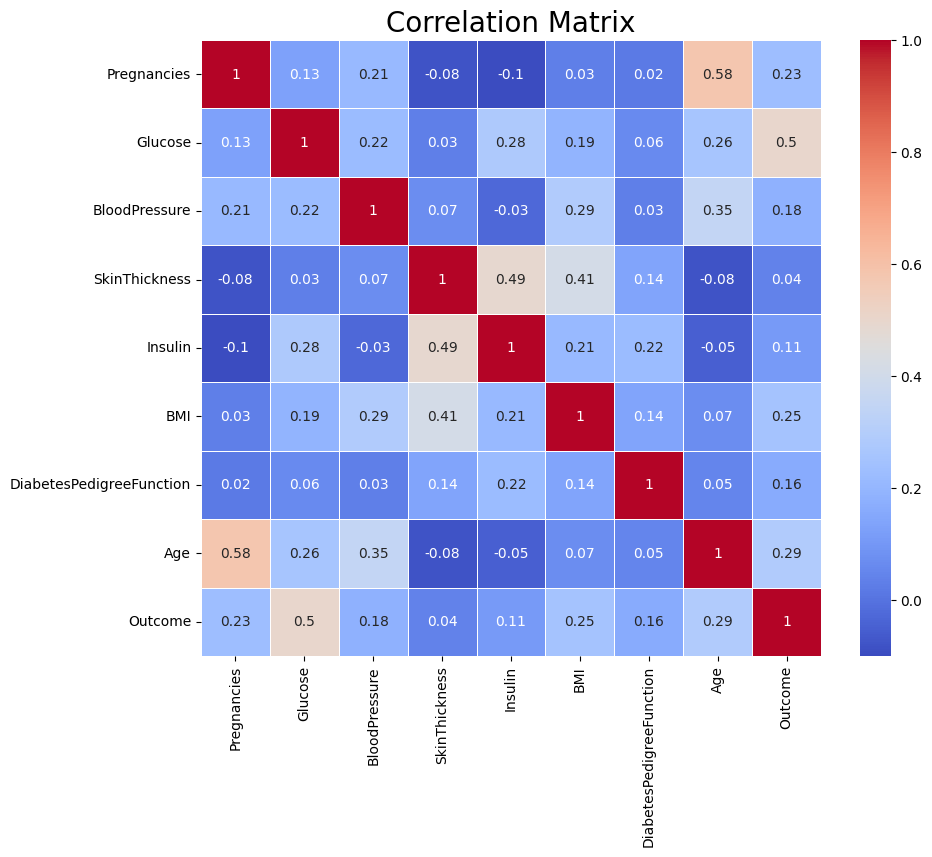

In [12]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix", size=20)

## Modeling

### Splitting Data

Splitting data menjadi 80% | 20%

In [13]:
X = data.drop(["Outcome"],axis =1)
y = data["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [14]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 2299
Total # of sample in train dataset: 1839
Total # of sample in test dataset: 460


### Standarisasi

Melakukan standarisasi pada data training dan data testing.

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.164504,-1.787227,0.362028,-1.392422,-0.835653,2.039265,-0.942620,1.275720
1,1.011841,0.589206,1.604467,-1.392422,-0.835653,-0.348188,-0.878622,1.650174
2,0.079121,-0.237379,0.539519,1.242752,-0.835653,1.124591,-0.774624,0.526812
3,-1.164504,0.554765,-0.347937,1.374511,2.219134,1.574177,-0.258637,-0.783778
4,-1.164504,-0.478467,1.071993,-1.392422,-0.835653,-0.658247,1.245328,2.773536
...,...,...,...,...,...,...,...,...
1834,0.079121,1.105822,1.604467,1.110993,-0.835653,-0.379194,-0.542630,0.339584
1835,-0.853598,0.589206,0.184537,1.901545,1.657053,0.814532,-0.122640,-0.783778
1836,-0.853598,-0.099615,-0.170446,0.452200,-0.835653,-0.735762,-0.902621,-1.064618
1837,-0.542691,0.072590,-0.170446,0.715717,0.325166,1.078082,1.825314,-0.877391


In [16]:
X_test = scaler.transform(X_test)

In [17]:
X_test = pd.DataFrame(X_test, columns=X.columns)
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.231785,-0.788436,0.539519,1.176872,-0.835653,0.799029,-0.766625,0.714039
1,-0.853598,0.107031,1.604467,1.967425,1.852560,2.721394,-0.418633,-0.128483
2,-0.853598,-0.547349,0.717011,-0.667749,0.166317,-1.975997,0.245351,-0.971005
3,0.390028,-0.237379,-0.525428,-1.392422,-0.835653,0.876544,-0.674627,0.807652
4,-0.853598,0.107031,1.604467,1.967425,1.852560,2.721394,-0.418633,-0.128483
...,...,...,...,...,...,...,...,...
455,-1.164504,-0.719554,0.894502,-0.404232,0.190756,-1.076826,-0.522630,-0.971005
456,0.700934,-0.685113,-1.057902,-0.140715,-0.175819,-0.813276,0.269351,-0.034870
457,-0.542691,0.107031,-0.170446,0.386320,-0.835653,0.721515,-0.358634,-0.502937
458,1.633653,-0.581790,0.362028,1.045114,-0.835653,0.116900,0.941335,1.275720


Membuat dataframe untuk menyimpan hasil training dan testing (MSE).

In [18]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'LinearRegression'])

### Model KNN

In [19]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

### Model Random Forest

In [20]:
rf = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42, min_samples_split=2)
rf.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=rf.predict(X_train), y_true=y_train)

### Model Linear Regression

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)
models.loc['train_mse','LinearRegression'] = mean_squared_error(y_pred=lr.predict(X_train), y_true=y_train)

## Evaluasi Model

Hasil evaluasi model dengan menggunakan metrik MSE.

In [22]:
# Dataframe untuk hasil evaluasi
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','Random Forest', 'Linear Regression'])

# Algoritma yang digunakan
model_dict = {'KNN': knn, 'Random Forest': rf, 'Linear Regression':lr}

# Menghitung MSE model train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,train,test
KNN,0.000002,0.000009
Random Forest,0.000002,0.000007
Linear Regression,0.000144,0.000147


Plot nilai MSE setiap model.

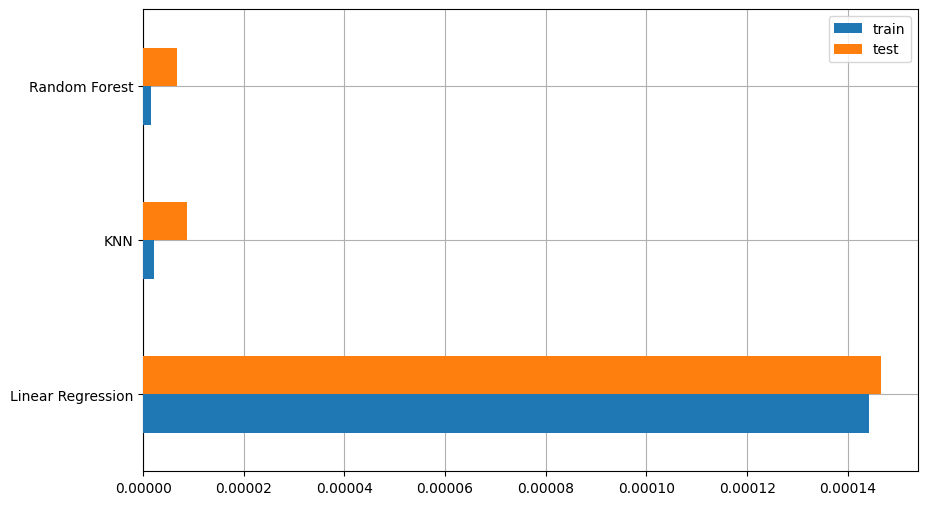

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

## Prediksi Model

Prediksi model dengan mengambil beberapa data testing

In [24]:
prediksi = X_test.iloc[:5].copy()
pred_dict = {'y_true':y_test[:5]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).astype(float).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_Random Forest,prediksi_Linear Regression
1272,0,0.0,0.0,0.2
2688,1,1.0,1.0,0.4
818,0,0.0,0.0,-0.0
987,1,1.0,1.0,0.4
2025,1,1.0,1.0,0.4
